In [3]:
#default_exp paperswithcode_tasks

In [4]:
#export
import pandas as pd
import re

In [5]:
%cd ..

/home/kuba/Projects/github_search


In [6]:
pd.options.display.max_colwidth = 200

In [25]:
#export

#export

def clean_task_name(task_name):
    task_name = re.sub(r"\d+d", "", task_name)
    task_name = task_name.replace("-", " ")
    return task_name


def get_paperswithcode_dfs(paperswithcode_filename='data/links-between-papers-and-code.json.gz', papers_filename='data/papers-with-abstracts.json.gz'):
    paperswithcode_df = pd.read_json(paperswithcode_filename)
    paperswithcode_df['repo'] = paperswithcode_df['repo_url'].str.replace('https://github.com/', '')

    all_papers_df = pd.read_json(papers_filename)
    return paperswithcode_df, all_papers_df


def get_papers_with_repo_df(all_papers_df, paperswithcode_df, repo_names):
    """
    add repo information to arxiv paper information
    """
    paperswithcode_with_repo_df = paperswithcode_df[paperswithcode_df['repo'].isin(repo_names)]
    paperswithcode_diff_columns = list(paperswithcode_with_repo_df.columns.difference(all_papers_df.columns)) + ['paper_url']
    papers_with_repo_df = all_papers_df[all_papers_df['paper_url'].isin(paperswithcode_with_repo_df['paper_url'])]
    
    return papers_with_repo_df.merge(paperswithcode_with_repo_df[paperswithcode_diff_columns], on='paper_url')


def get_papers_with_biggest_tasks(papers_with_repo_df, n_biggest_tasks):
    """
    fetch papers which contain at least one task that is in n_biggest_tasks (by number of task occurrences)
    """
    all_tasks = papers_with_repo_df.explode('tasks')['tasks'] 
    biggest_tasks = all_tasks.value_counts()[:n_biggest_tasks]
    
    papers_with_repo_with_biggest_tasks_df = papers_with_repo_df[papers_with_repo_df['tasks'].apply(lambda tasks: any(task in biggest_tasks.index for task in tasks))]
    papers_with_repo_with_biggest_tasks_df['most_common_task'] = papers_with_repo_with_biggest_tasks_df['tasks'].apply(
        lambda tasks: biggest_tasks[[t for t in tasks if t in biggest_tasks.index]].idxmax() if len(biggest_tasks[ [t for t in tasks if t in biggest_tasks.index]]) > 0 else None
    )
    return papers_with_repo_with_biggest_tasks_df 


def get_papers_with_biggest_tasks_df(n_biggest_tasks=None):
    paperswithcode_df, all_papers_df = get_paperswithcode_dfs()
    n_biggest_tasks = n_biggest_tasks if not n_biggest_tasks is None else len(paperswithcode_df) 
    papers_with_repo_df = get_papers_with_repo_df(all_papers_df, paperswithcode_df, paperswithcode_df['repo'])
    return get_papers_with_biggest_tasks(papers_with_repo_df, n_biggest_tasks=n_biggest_tasks) 

In [19]:
get_papers_with_repos_df(['transformers'], top_biggest_tasks=10000)

Index(['arxiv_id', 'title', 'abstract', 'url_abs', 'url_pdf', 'proceeding',
       'authors', 'tasks', 'date', 'methods', 'framework',
       'mentioned_in_github', 'mentioned_in_paper', 'paper_arxiv_id',
       'paper_title', 'paper_url_abs', 'paper_url_pdf', 'repo', 'repo_url',
       'paper_url'],
      dtype='object')


KeyError: 'tasks'

In [2]:
!ls data/ipca*

ls: cannot access 'data/ipca*': No such file or directory


In [7]:
paperswithcode_df = pd.read_json('data/links-between-papers-and-code.json.gz')
paperswithcode_df['repo'] = paperswithcode_df['repo_url'].str.replace('https://github.com/', '')

In [8]:
all_papers_df = pd.read_json('data/papers-with-abstracts.json.gz')

In [9]:
python_files_df = pd.read_csv('data/python_files.csv')

In [10]:
python_files_df

,owner,repo_name,file_path,content,sha
0,trangvu,ape-npi,run-tests.py,#!/usr/bin/env python3\nimport subprocess\nimport shlex\nimport re\nimport os\nimport argparse\n\nOKGREEN = '\033[92m'\nFAIL = '\033[91m'\nENDC = '\033[0m'\n\nparser = argparse.ArgumentParser()\np...,5364c4a113de40cb17e40b052fa012ad7daba2bd
1,trangvu,ape-npi,scripts/apply_bpe.py,"#!/usr/bin/env python3\n# Author: Rico Sennrich\n\n""""""Use operations learned with learn_bpe.py to encode a new text.\nThe text will not be smaller, but use only a fixed vocabulary, with rare words...",261dd0ffc2e10ee32ea99ca80c99cde50a6e7636
2,trangvu,ape-npi,scripts/concat-bpe.py,#!/usr/bin/env python3\n\nimport argparse\nparser = argparse.ArgumentParser()\nparser.add_argument('vocab')\nparser.add_argument('bpe')\n\n\ndef build_vocab(bpe_pairs):\n vocab = set()\n for...,e6bc04ce4b16c0b91d00fc576ed5d261c711760f
3,trangvu,ape-npi,scripts/copy-model.py,#!/usr/bin/env python3\nimport argparse\nimport subprocess\nimport os\nimport shutil\nimport re\nimport sys\n\nparser = argparse.ArgumentParser()\nparser.add_argument('model_dir')\nparser.add_argu...,56014b1516fd6df606d500b5efc190efbe8d5203
4,trangvu,ape-npi,scripts/coverage.py,#!/usr/bin/env python3\n\nimport argparse\nfrom collections import Counter\nfrom itertools import starmap\n\nparser = argparse.ArgumentParser()\nparser.add_argument('filename')\nparser.add_argumen...,f008bc3a194503c2e0c68ea2d5389db81905f6bd
...,...,...,...,...,...
560178,KyeongmoonKim,sb,tools/convert_from_depre.py,# --------------------------------------------------------\n# Tensorflow Faster R-CNN\n# Licensed under The MIT License [see LICENSE for details]\n# Written by Xinlei Chen\n# ---------------------...,4ed7125b8568a0f9c60a3bf4670747ec4c497942
560179,KyeongmoonKim,sb,tools/demo.py,#!/usr/bin/env python\n\n# --------------------------------------------------------\n# Tensorflow Faster R-CNN\n# Licensed under The MIT License [see LICENSE for details]\n# Written by Xinlei Chen...,2bd89335df588e010bbb22370274dcbd04bcb407
560180,KyeongmoonKim,sb,tools/reval.py,#!/usr/bin/env python\n\n# --------------------------------------------------------\n# Fast R-CNN\n# Copyright (c) 2015 Microsoft\n# Licensed under The MIT License [see LICENSE for details]\n# Wri...,612ae317fa5362b2b03b667cc2a8e17323d1a16f
560181,KyeongmoonKim,sb,tools/test_net.py,"# --------------------------------------------------------\n# Tensorflow Faster R-CNN\n# Licensed under The MIT License [see LICENSE for details]\n# Written by Zheqi he, Xinlei Chen, based on code...",c9cfc53f46f7f9d6c0885ffcad8727f86716ce22


In [11]:
python_files_df['repo_name_with_owner'] = python_files_df['owner']  + '/' + python_files_df['repo_name']
repo_names = python_files_df['repo_name_with_owner'].unique()

In [12]:
all_papers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199579 entries, 0 to 199578
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   paper_url   199579 non-null  object        
 1   arxiv_id    159808 non-null  object        
 2   title       199405 non-null  object        
 3   abstract    199047 non-null  object        
 4   url_abs     199579 non-null  object        
 5   url_pdf     199405 non-null  object        
 6   proceeding  58385 non-null   object        
 7   authors     199579 non-null  object        
 8   tasks       199579 non-null  object        
 9   date        199405 non-null  datetime64[ns]
 10  methods     199579 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 16.7+ MB


In [13]:
paperswithcode_df['repo'] = paperswithcode_df['repo_url'].str.replace('https://github.com/', '')

In [14]:
paperswithcode_repos = paperswithcode_df['repo']

In [15]:
len(set(paperswithcode_repos))

72111

In [16]:
len(repo_names)

5361

In [17]:
len(set(repo_names).intersection(paperswithcode_repos))

5361

In [18]:
paperswithcode_df['repo']

0                        trangvu/ape-npi
1                        xiezheng-cs/DTQ
2                   Alaya-in-Matrix/MACE
3                    harryhan618/LaneNet
4        testingautomated-usi/selforacle
                      ...               
92580                 mabragor/cl-vknots
92581              Expander/FlexibleSUSY
92582             jiasenlu/HieCoAttenVQA
92583            mgaido91/FBK-fairseq-ST
92584          blessengeorge/compare_gan
Name: repo, Length: 92585, dtype: object

In [19]:
repo_names

array(['trangvu/ape-npi', 'xiezheng-cs/DTQ', 'harryhan618/LaneNet', ...,
       'laurinwagner/grouploss_plus', 'davydden/large-strain-matrix-free',
       'KyeongmoonKim/sb'], dtype=object)

In [20]:
paperswithcode_df.columns

Index(['paper_url', 'paper_title', 'paper_arxiv_id', 'paper_url_abs',
       'paper_url_pdf', 'repo_url', 'mentioned_in_paper',
       'mentioned_in_github', 'framework', 'repo'],
      dtype='object')

In [21]:
papers_with_repo_df = get_papers_with_repo_df(all_papers_df, paperswithcode_df, repo_names)
papers_with_repo_df['tasks'].apply(len).value_counts()

1     1947
2     1569
0     1442
3      826
4      399
5      194
9       81
6       52
13      48
7       28
8       15
11       4
10       4
Name: tasks, dtype: int64

In [22]:
all_tasks = papers_with_repo_df.explode('tasks')['tasks'] 

In [23]:
all_tasks.nunique()

986

In [24]:
all_tasks.value_counts()[all_tasks.value_counts() > 10]#[:101].to_dict()

Image Classification        469
Object Detection            461
Semantic Segmentation       449
Machine Translation         258
Language Modelling          246
                           ... 
Tensor Networks              11
Salient Object Detection     11
Incremental Learning         11
Relational Reasoning         11
Text-To-Sql                  11
Name: tasks, Length: 216, dtype: int64

In [25]:
papers_with_repo_with_biggest_tasks_df = get_papers_with_biggest_tasks(papers_with_repo_df, 200)

<ipython-input-6-927a2506dded>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  papers_with_repo_with_biggest_tasks_df['most_common_task'] = papers_with_repo_with_biggest_tasks_df['tasks'].apply(


In [26]:
papers_with_repo_with_biggest_tasks_df[papers_with_repo_with_biggest_tasks_df['tasks'].apply(lambda tasks: 'Hierarchical structure' in tasks)]['title']

926                                                               Learning to Abstract and Predict Human Actions
1772                            Cross-Modal Hierarchical Modelling for Fine-Grained Sketch Based Image Retrieval
1966                                         Unsupervised Embedding of Hierarchical Structure in Euclidean Space
2781                                             Benchmarking Deep Reinforcement Learning for Continuous Control
2947                                                              PatchNet: A Tool for Deep Patch Classification
2959                                                              Hyperbolic Graph Convolutional Neural Networks
3056    Learning to Rank Question-Answer Pairs using Hierarchical Recurrent Encoder with Latent Topic Clustering
3142                               A Hierarchical Latent Variable Encoder-Decoder Model for Generating Dialogues
3143                               A Hierarchical Latent Variable Encoder-Decoder Model for Gene

In [27]:
papers_with_repo_with_biggest_tasks_df[papers_with_repo_with_biggest_tasks_df['tasks'].apply(len) > 1]

,paper_url,arxiv_id,title,abstract,url_abs,url_pdf,proceeding,authors,tasks,date,...,framework,mentioned_in_github,mentioned_in_paper,paper_arxiv_id,paper_title,paper_url_abs,paper_url_pdf,repo,repo_url,most_common_task
3,https://paperswithcode.com/paper/abcnn-attention-based-convolutional-neural,1512.05193,ABCNN: Attention-Based Convolutional Neural Network for Modeling Sentence Pairs,"How to model a pair of sentences is a critical issue in many NLP tasks such\nas answer selection (AS), paraphrase identification (PI) and textual entailment\n(TE). Most prior work (i) deals with o...",http://arxiv.org/abs/1512.05193v4,http://arxiv.org/pdf/1512.05193v4.pdf,TACL 2016 1,"[Wenpeng Yin, Hinrich Schütze, Bing Xiang, Bo-Wen Zhou]","[Answer Selection, Natural Language Inference, Paraphrase Identification]",2015-12-16,...,tf,True,False,1512.05193,ABCNN: Attention-Based Convolutional Neural Network for Modeling Sentence Pairs,http://arxiv.org/abs/1512.05193v4,http://arxiv.org/pdf/1512.05193v4.pdf,shamalwinchurkar/question-classification,https://github.com/shamalwinchurkar/question-classification,Natural Language Inference
4,https://paperswithcode.com/paper/unsupervised-representation-learning-by-1,1803.07728,Unsupervised Representation Learning by Predicting Image Rotations,"Over the last years, deep convolutional neural networks (ConvNets) have\ntransformed the field of computer vision thanks to their unparalleled capacity\nto learn high level semantic image features...",http://arxiv.org/abs/1803.07728v1,http://arxiv.org/pdf/1803.07728v1.pdf,ICLR 2018 1,"[Spyros Gidaris, Praveer Singh, Nikos Komodakis]","[Representation Learning, Unsupervised Representation Learning]",2018-03-21,...,tf,True,False,1803.07728,Unsupervised Representation Learning by Predicting Image Rotations,http://arxiv.org/abs/1803.07728v1,http://arxiv.org/pdf/1803.07728v1.pdf,nab-126/resnet,https://github.com/nab-126/resnet,Representation Learning
5,https://paperswithcode.com/paper/semantic-image-synthesis-via-adversarial,1707.06873,Semantic Image Synthesis via Adversarial Learning,"In this paper, we propose a way of synthesizing realistic images directly\nwith natural language description, which has many useful applications, e.g.\nintelligent image manipulation. We attempt t...",http://arxiv.org/abs/1707.06873v1,http://arxiv.org/pdf/1707.06873v1.pdf,ICCV 2017 10,"[Hao Dong, Simiao Yu, Chao Wu, Yike Guo]","[Image Generation, Image Manipulation]",2017-07-21,...,pytorch,True,False,1707.06873,Semantic Image Synthesis via Adversarial Learning,http://arxiv.org/abs/1707.06873v1,http://arxiv.org/pdf/1707.06873v1.pdf,vtddggg/BilinearGAN_for_LBIE,https://github.com/vtddggg/BilinearGAN_for_LBIE,Image Generation
10,https://paperswithcode.com/paper/ensembles-of-many-diverse-weak-defenses-can,2001.00308,ATHENA: A Framework based on Diverse Weak Defenses for Building Adversarial Defense,"There has been extensive research on developing defense techniques against adversarial attacks; however, they have been mainly designed for specific model families or application domains, therefor...",https://arxiv.org/abs/2001.00308v2,https://arxiv.org/pdf/2001.00308v2.pdf,None,"[Ying Meng, Jianhai Su, Jason O'Kane, Pooyan Jamshidi]","[Adversarial Defense, Denoising]",2020-01-02,...,tf,True,False,2001.00308,ATHENA: A Framework based on Diverse Weak Defenses for Building Adversarial Defense,https://arxiv.org/abs/2001.00308v2,https://arxiv.org/pdf/2001.00308v2.pdf,softsys4ai/FlexiBO,https://github.com/softsys4ai/FlexiBO,Denoising
11,https://paperswithcode.com/paper/3d-bounding-box-estimation-using-deep,1612.00496,3D Bounding Box Estimation Using Deep Learning and Geometry,"We present a method for 3D object detection and pose estimation from a single\nimage. In contrast to current techniques that only regress the 3D orientation\nof an object, our method first regress...",http://arxiv.org/abs/1612.00496v2,http://arxiv.org/pdf/1612.00496v2.pdf,CVPR 2017 7,"[Arsalan Mousavian, Dragomir Anguelov, John Fly

In [28]:
papers_with_repo_with_biggest_tasks_df.shape

(4571, 21)

## Selecting most common task

In [29]:
papers_with_repo_with_biggest_tasks_df['most_common_task'].value_counts()[:100].sum()

4335

In [30]:
duplicated_classes = {
    "Document Classification": "Text Classification",
    "Abstractive Text Summarization": "Text Summarization",
    "3D Human Pose Estimation": "Pose Estimation",
    "Semantic Similarity": "Semantic Textual Similarity",
    "Trajectory Prediction": "Autonomous Vehicles",
    "Autonomous Driving": "Autonomous Vehicles",
    "Feature Importance": "Feature Selection",
    "Visual Tracking": "Object Tracking",
    "Object Recognition": "Object Detection",
    "Multi-Task Learning": "Transfer Learning"
}

In [31]:
questionable_duplicated_classes = {
    "Adversarial Attack": "Adversarial Machine Learning",
    "Adversarial Defense": "Adversarial Machine Learning",
    "Voice Conversion": "Speech Generation",
    "Lesion Segmentation": "Semantic Segmentation"
}

In [32]:
invalid_classes = [
    "Text-To-Sql",
    "Hiearchical structure"
]

In [33]:
most_common_task_counts = papers_with_repo_with_biggest_tasks_df['most_common_task'].value_counts()

In [34]:
most_common_task_counts[most_common_task_counts > 10].sum()#most_common_task_counts[:150].to_dict()

4164

In [35]:
most_common_task_counts.shape

(167,)

<AxesSubplot:>

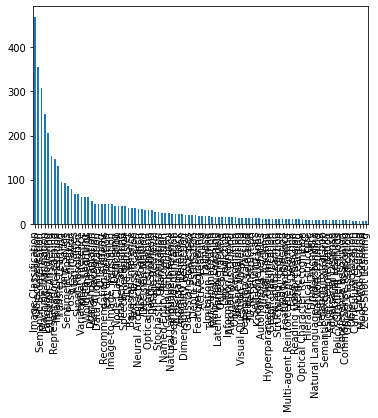

In [36]:
papers_with_repo_with_biggest_tasks_df['most_common_task'].value_counts()[:100].plot.bar()

## Selecting most matching task

Matching is defined using similarity of embeddings of task name and article title

In [37]:
import numpy as np
import tqdm
from sklearn import metrics

In [38]:
text = papers_with_repo_with_biggest_tasks_df.iloc[2]['title']
matched_texts = papers_with_repo_with_biggest_tasks_df.iloc[2]['tasks']

In [39]:
matched_texts

['Representation Learning', 'Unsupervised Representation Learning']

In [46]:
import paperswithcode

client = paperswithcode.PapersWithCodeClient()

In [47]:
client.area_task_list('computer-vision', items_per_page=1000).results

[Task(id='real-time-multi-object-tracking', name='Real-Time Multi-Object Tracking', description='Online and Real-time Multi-Object Tracking would achieve the real-time speed over 30 frames per second with online approach.'),
 Task(id='multi-animal-tracking-with-identification', name='Multi-Animal Tracking with identification', description='Tracking all animals in a video maintaining their identities after touches or occlusions.'),
 Task(id='hand-gesture-recognition', name='Hand Gesture Recognition', description=''),
 Task(id='visual-question-answering', name='Visual Question Answering', description='**Visual Question Answering** is a semantic task that aims to answer questions based on an image.\r\n\r\nImage Source: [visualqa.org](https://visualqa.org/)'),
 Task(id='image-compression-artifact-reduction', name='Image Compression Artifact Reduction', description=''),
 Task(id='video-frame-interpolation', name='Video Frame Interpolation', description='The goal of **Video Frame Interpolati

In [48]:
papers_with_repo_with_biggest_tasks_df.head()

,paper_url,arxiv_id,title,abstract,url_abs,url_pdf,proceeding,authors,tasks,date,...,framework,mentioned_in_github,mentioned_in_paper,paper_arxiv_id,paper_title,paper_url_abs,paper_url_pdf,repo,repo_url,most_common_task
0,https://paperswithcode.com/paper/a-reductions-approach-to-fair-classification,1803.02453,A Reductions Approach to Fair Classification,"We present a systematic approach for achieving fairness in a binary\nclassification setting. While we focus on two well-known quantitative\ndefinitions of fairness, our approach encompasses many o...",http://arxiv.org/abs/1803.02453v3,http://arxiv.org/pdf/1803.02453v3.pdf,ICML 2018 7,"[Alekh Agarwal, Alina Beygelzimer, Miroslav Dudík, John Langford, Hanna Wallach]",[Fairness],2018-03-06,...,none,True,False,1803.02453,A Reductions Approach to Fair Classification,http://arxiv.org/abs/1803.02453v3,http://arxiv.org/pdf/1803.02453v3.pdf,fairlearn/fairlearn,https://github.com/fairlearn/fairlearn,Fairness
3,https://paperswithcode.com/paper/abcnn-attention-based-convolutional-neural,1512.05193,ABCNN: Attention-Based Convolutional Neural Network for Modeling Sentence Pairs,"How to model a pair of sentences is a critical issue in many NLP tasks such\nas answer selection (AS), paraphrase identification (PI) and textual entailment\n(TE). Most prior work (i) deals with o...",http://arxiv.org/abs/1512.05193v4,http://arxiv.org/pdf/1512.05193v4.pdf,TACL 2016 1,"[Wenpeng Yin, Hinrich Schütze, Bing Xiang, Bo-Wen Zhou]","[Answer Selection, Natural Language Inference, Paraphrase Identification]",2015-12-16,...,tf,True,False,1512.05193,ABCNN: Attention-Based Convolutional Neural Network for Modeling Sentence Pairs,http://arxiv.org/abs/1512.05193v4,http://arxiv.org/pdf/1512.05193v4.pdf,shamalwinchurkar/question-classification,https://github.com/shamalwinchurkar/question-classification,Natural Language Inference
4,https://paperswithcode.com/paper/unsupervised-representation-learning-by-1,1803.07728,Unsupervised Representation Learning by Predicting Image Rotations,"Over the last years, deep convolutional neural networks (ConvNets) have\ntransformed the field of computer vision thanks to their unparalleled capacity\nto learn high level semantic image features...",http://arxiv.org/abs/1803.07728v1,http://arxiv.org/pdf/1803.07728v1.pdf,ICLR 2018 1,"[Spyros Gidaris, Praveer Singh, Nikos Komodakis]","[Representation Learning, Unsupervised Representation Learning]",2018-03-21,...,tf,True,False,1803.07728,Unsupervised Representation Learning by Predicting Image Rotations,http://arxiv.org/abs/1803.07728v1,http://arxiv.org/pdf/1803.07728v1.pdf,nab-126/resnet,https://github.com/nab-126/resnet,Representation Learning
5,https://paperswithcode.com/paper/semantic-image-synthesis-via-adversarial,1707.06873,Semantic Image Synthesis via Adversarial Learning,"In this paper, we propose a way of synthesizing realistic images directly\nwith natural language description, which has many useful applications, e.g.\nintelligent image manipulation. We attempt t...",http://arxiv.org/abs/1707.06873v1,http://arxiv.org/pdf/1707.06873v1.pdf,ICCV 2017 10,"[Hao Dong, Simiao Yu, Chao Wu, Yike Guo]","[Image Generation, Image Manipulation]",2017-07-21,...,pytorch,True,False,1707.06873,Semantic Image Synthesis via Adversarial Learning,http://arxiv.org/abs/1707.06873v1,http://arxiv.org/pdf/1707.06873v1.pdf,vtddggg/BilinearGAN_for_LBIE,https://github.com/vtddggg/BilinearGAN_for_LBIE,Image Generation
10,https://paperswithcode.com/paper/ensembles-of-many-diverse-weak-defenses-can,2001.00308,ATHENA: A Framework based on Diverse Weak Defenses for Building Adversarial Defense,"There has been extensive research on developing defense techniques against adversarial attacks; however, they have been mainly designed for specific model families or application domains, therefor...",https://arxiv.org/abs/2001.00308v2,https://arxiv.org/pdf/2001.00308v2.pdf,None,"[Ying Meng, Jianhai Su, Jason O'Kane, Pooyan Jamshidi]","[Adversarial Defense, Denoising]",2

In [49]:
dict(client.task_get('trajectory-prediction'))

{'id': 'trajectory-prediction',
 'name': 'Trajectory Prediction',
 'description': '**Trajectory Prediction** is the problem of predicting the short-term (1-3 seconds) and long-term (3-5 seconds) spatial coordinates of various road-agents such as cars, buses, pedestrians, rickshaws, and animals, etc. These road-agents have different dynamic behaviors that may correspond to aggressive or conservative driving styles.\r\n\r\n\r\n<span class="description-source">Source: [Forecasting Trajectory and Behavior of Road-Agents Using Spectral Clustering in Graph-LSTMs ](https://arxiv.org/abs/1912.01118)</span>'}

In [50]:
client.task_paper_list('trajectory-prediction')

Papers(count=284, next_page=2, previous_page=None, results=[Paper(id='an-approach-to-vehicle-trajectory-prediction', arxiv_id='1802.08632', nips_id=None, url_abs='http://arxiv.org/abs/1802.08632v2', url_pdf='http://arxiv.org/pdf/1802.08632v2.pdf', title='An Approach to Vehicle Trajectory Prediction Using Automatically Generated Traffic Maps', abstract='Trajectory and intention prediction of traffic participants is an important\ntask in automated driving and crucial for safe interaction with the\nenvironment. In this paper, we present a new approach to vehicle trajectory\nprediction based on automatically generated maps containing statistical\ninformation about the behavior of traffic participants in a given area. These\nmaps are generated based on trajectory observations using image processing and\nmap matching techniques and contain all typical vehicle movements and\nprobabilities in the considered area. Our prediction approach matches an\nobserved trajectory to a behavior contained i

In [51]:
paper_id = papers_with_repo_with_biggest_tasks_df['paper_url'].iloc[1].split('/')[-1]

In [52]:
paper_id.split('/')[-1]

'abcnn-attention-based-convolutional-neural'

In [53]:
dict(client.paper_get(paper_id))

{'id': 'abcnn-attention-based-convolutional-neural',
 'arxiv_id': '1512.05193',
 'nips_id': None,
 'url_abs': 'http://arxiv.org/abs/1512.05193v4',
 'url_pdf': 'http://arxiv.org/pdf/1512.05193v4.pdf',
 'title': 'ABCNN: Attention-Based Convolutional Neural Network for Modeling Sentence Pairs',
 'abstract': "How to model a pair of sentences is a critical issue in many NLP tasks such\nas answer selection (AS), paraphrase identification (PI) and textual entailment\n(TE). Most prior work (i) deals with one individual task by fine-tuning a\nspecific system; (ii) models each sentence's representation separately, rarely\nconsidering the impact of the other sentence; or (iii) relies fully on manually\ndesigned, task-specific linguistic features. This work presents a general\nAttention Based Convolutional Neural Network (ABCNN) for modeling a pair of\nsentences. We make three contributions. (i) ABCNN can be applied to a wide\nvariety of tasks that require modeling of sentence pairs. (ii) We propo

In [54]:
paper_id

'abcnn-attention-based-convolutional-neural'

In [55]:
tasks = client.http.get(f"/papers/{paper_id}/tasks/")['results']

In [56]:
[paperswithcode.models.Task(**task) for task in tasks]

[Task(id='natural-language-inference', name='Natural Language Inference', description='Natural language inference is the task of determining whether a "hypothesis" is \r\ntrue (entailment), false (contradiction), or undetermined (neutral) given a "premise".\r\n\r\nExample:\r\n\r\n| Premise | Label | Hypothesis |\r\n| --- | ---| --- |\r\n| A man inspects the uniform of a figure in some East Asian country. | contradiction | The man is sleeping. |\r\n| An older and younger man smiling. | neutral  | Two men are smiling and laughing at the cats playing on the floor. |\r\n| A soccer game with multiple males playing. | entailment | Some men are playing a sport. |'),
 Task(id='paraphrase-identification', name='Paraphrase Identification', description='The goal of **Paraphrase Identification** is to determine whether a pair of sentences have the same meaning.\r\n\r\n\r\n<span class="description-source">Source: [Adversarial Examples with Difficult Common Words for Paraphrase Identification ](http

In [57]:
import paperswithcode

client = paperswithcode.PapersWithCodeClient()
areas = client.area_list().results
s = 0

area_grouped_tasks = {}

for a in areas:
    area_tasks = [t.id for t in client.area_task_list(a.id, items_per_page=1000).results]
    area_grouped_tasks[a.id] = area_tasks
    n_tasks_per_area = len(area_tasks)
    print(a.id, ':', n_tasks_per_area)
    s += n_tasks_per_area
print('total tasks:', s)

adversarial : 9
audio : 30
computer-code : 35
computer-vision : 500
graphs : 52
knowledge-base : 22
medical : 183
methodology : 138
miscellaneous : 124
music : 17
natural-language-processing : 347
playing-games : 39
reasoning : 15
robots : 27
speech : 51
time-series : 52
total tasks: 1641


In [58]:
area_tasks_df = pd.DataFrame({'area': area_grouped_tasks.keys(), 'task': area_grouped_tasks.values()}).explode('task')

In [59]:
papers_with_repo_df['task'] = papers_with_repo_df['tasks']

In [60]:
papers_task_exploded_df = papers_with_repo_df.explode('task')

In [61]:
task_api_normalized = papers_task_exploded_df['task'].str.lower().str.replace(' ', '-')

In [62]:
task_api_normalized

0                         fairness
1                information-plane
2                information-plane
3                 answer-selection
3       natural-language-inference
                   ...            
6604                misinformation
6605              voice-conversion
6606              voice-conversion
6607                style-transfer
6608                style-transfer
Name: task, Length: 13636, dtype: object

In [63]:
tasks_without_area = task_api_normalized[~task_api_normalized.isin(area_tasks_df['task'])].unique()

In [64]:
other_tasks_df = pd.DataFrame({"area": "miscellaneous", "task": tasks_without_area})

In [65]:
all_area_tasks_df = pd.concat([area_tasks_df, other_tasks_df])

In [66]:
all_area_tasks_df.head()

,area,task
0,adversarial,adversarial-text
0,adversarial,adversarial-attack
0,adversarial,adversarial-defense
0,adversarial,inference-attack
0,adversarial,data-poisoning


In [67]:
all_area_tasks_df.to_csv('data/paperswithcode_tasks.csv', index=None)

In [68]:
papers_task_exploded_df['normalized_task'] = task_api_normalized

In [104]:
papers_area_df = papers_task_exploded_df.merge(all_area_tasks_df, left_on='normalized_task', right_on='task', suffixes=['', '_']).drop(columns=['task_'])

In [105]:
all_area_tasks_df

,area,task
0,adversarial,adversarial-text
0,adversarial,adversarial-attack
0,adversarial,adversarial-defense
0,adversarial,inference-attack
0,adversarial,data-poisoning
...,...,...
238,miscellaneous,sleep-quality
239,miscellaneous,left-atrium-segmentation
240,miscellaneous,drug–drug-interaction-extraction
241,miscellaneous,video-question-answering


In [100]:
from sklearn import model_selection

In [101]:
papers_area_df.columns

Index(['paper_url', 'arxiv_id', 'title', 'abstract', 'url_abs', 'url_pdf',
       'proceeding', 'authors', 'tasks', 'date', 'methods', 'framework',
       'mentioned_in_github', 'mentioned_in_paper', 'paper_arxiv_id',
       'paper_title', 'paper_url_abs', 'paper_url_pdf', 'repo', 'repo_url',
       'task', 'normalized_task', 'area'],
      dtype='object')

In [118]:
papers_area_df['area'].value_counts()

miscellaneous                  4123
computer-vision                3346
natural-language-processing    2433
methodology                    2113
medical                         606
graphs                          260
time-series                     255
speech                          248
playing-games                   198
music                           177
reasoning                       131
knowledge-base                  118
adversarial                      68
robots                           55
audio                            42
computer-code                    37
Name: area, dtype: int64

In [125]:
papers_area_df.groupby(['area', 'task']).agg('count')['paper_url']

area         task                    
adversarial  Adversarial Attack          32
             Adversarial Defense         21
             Adversarial Text             4
             Data Poisoning               4
             Inference Attack             7
                                         ..
time-series  Time Series Forecasting     14
             Time Series Prediction       5
             Time-to-Event Prediction     1
             Traffic Prediction           9
             Trajectory Prediction       13
Name: paper_url, Length: 1021, dtype: int64

In [134]:
area_counts = papers_area_df['area'].value_counts()
area_weights = area_counts.copy()
area_weights = area_weights / area_weights.sum()

In [141]:
area_tasks_df[area_tasks_df['area'] == 'adversarial']

,area,task
0,adversarial,adversarial-text
0,adversarial,adversarial-attack
0,adversarial,adversarial-defense
0,adversarial,inference-attack
0,adversarial,data-poisoning
0,adversarial,website-fingerprinting-attacks
0,adversarial,provable-adversarial-defense
0,adversarial,website-fingerprinting-defense
0,adversarial,real-world-adversarial-attack


In [138]:
papers_area_df[papers_area_df['area'] == 'adversarial']['task']

2121     Adversarial Defense
2122     Adversarial Defense
2123     Adversarial Defense
2124     Adversarial Defense
2125     Adversarial Defense
                ...         
8535          Data Poisoning
10453       Adversarial Text
10454       Adversarial Text
10455       Adversarial Text
10456       Adversarial Text
Name: task, Length: 68, dtype: object

In [113]:
train_tasks_df, test_tasks_df = model_selection.train_test_split(all_area_tasks_df, test_size=0.2, stratify=all_area_tasks_df['area'])

In [116]:
test_tasks_df

,area,task
4,graphs,graph-classification
3,computer-vision,rf-based-gesture-recognition
124,miscellaneous,handwritten-digit-recognition
7,methodology,entity-embeddings
6,medical,nuclei-classification
...,...,...
175,miscellaneous,image-retrieval-with-multi-modal-query
13,robots,robot-task-planning
5,knowledge-base,relational-pattern-learning
134,miscellaneous,scene-parsing


In [107]:
papers_train_df, papers_test_df = 

In [110]:
papers_test_df.shape

(2842, 23)

In [111]:
papers_train_df

,paper_url,arxiv_id,title,abstract,url_abs,url_pdf,proceeding,authors,tasks,date,...,mentioned_in_paper,paper_arxiv_id,paper_title,paper_url_abs,paper_url_pdf,repo,repo_url,task,normalized_task,area
12733,https://paperswithcode.com/paper/unpaired-image-to-image-translation-using,1703.10593,Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks,Image-to-image translation is a class of vision and graphics problems where the goal is to learn the mapping between an input image and an output image using a training set of aligned image pairs....,https://arxiv.org/abs/1703.10593v7,https://arxiv.org/pdf/1703.10593v7.pdf,ICCV 2017 10,"[Jun-Yan Zhu, Taesung Park, Phillip Isola, Alexei A. Efros]","[Image-to-Image Translation, Multimodal Unsupervised Image-To-Image Translation, Style Transfer, Unsupervised Image-To-Image Translation]",2017-03-30,...,False,1703.10593,Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks,https://arxiv.org/abs/1703.10593v7,https://arxiv.org/pdf/1703.10593v7.pdf,danieldritter/deep_learning_models,https://github.com/danieldritter/deep_learning_models,Unsupervised Image-To-Image Translation,unsupervised-image-to-image-translation,miscellaneous
240,https://paperswithcode.com/paper/network-embedding-as-matrix-factorization,1710.02971,"Network Embedding as Matrix Factorization: Unifying DeepWalk, LINE, PTE, and node2vec","Since the invention of word2vec, the skip-gram model has significantly\nadvanced the research of network embedding, such as the recent emergence of the\nDeepWalk, LINE, PTE, and node2vec approache...",http://arxiv.org/abs/1710.02971v4,http://arxiv.org/pdf/1710.02971v4.pdf,None,"[Jiezhong Qiu, Yuxiao Dong, Hao Ma, Jian Li, Kuansan Wang, Jie Tang]","[Network Embedding, Representation Learning]",2017-10-09,...,False,1710.02971,"Network Embedding as Matrix Factorization: Unifying DeepWalk, LINE, PTE, and node2vec",http://arxiv.org/abs/1710.02971v4,http://arxiv.org/pdf/1710.02971v4.pdf,fahrbach/icml-2020-faster-graph-embeddings,https://github.com/fahrbach/icml-2020-faster-graph-embeddings,Representation Learning,representation-learning,methodology
10245,https://paperswithcode.com/paper/deep-semi-supervised-anomaly-detection,1906.02694,Deep Semi-Supervised Anomaly Detection,Deep approaches to anomaly detection have recently shown promising results over shallow methods on large and complex datasets. Typically anomaly detection is treated as an unsupervised learning pr...,https://arxiv.org/abs/1906.02694v2,https://arxiv.org/pdf/1906.02694v2.pdf,ICLR 2020 1,"[Lukas Ruff, Robert A. Vandermeulen, Nico Görnitz, Alexander Binder, Emmanuel Müller, Klaus-Robert Müller, Marius Kloft]","[Anomaly Detection, Outlier Detection]",2019-06-06,...,False,1906.02694,Deep Semi-Supervised Anomaly Detection,https://arxiv.org/abs/1906.02694v2,https://arxiv.org/pdf/1906.02694v2.pdf,kevinwss/Deep-SAD-Baseline,https://github.com/kevinwss/Deep-SAD-Baseline,Outlier Detection,outlier-detection,methodology
8193,https://paperswithcode.com/paper/exact-hard-monotonic-attention-for-character,1905.06319,Exact Hard Monotonic Attention for Character-Level Transduction,"Many common character-level, string-to-string transduction tasks, e.g. graphemeto-phoneme conversion and morphological inflection, consist almost exclusively of monotonic transduction. Neural sequ...",https://arxiv.org/abs/1905.06319v2,https://arxiv.org/pdf/1905.06319v2.pdf,ACL 2019 7,"[Shijie Wu, Ryan Cotterell]",[Morphological Inflection],2019-05-15,...,False,1905.06319,Exact Hard Monotonic Attention for Character-Level Transduction,https://arxiv.org/abs/1905.06319v2,https://arxiv.org/pdf/1905.06319v2.pdf,AssafSinger94/sigmorphon-2020-inflection,https://github.com/AssafSinger94/sigmorphon-2020-inflection,Morphological Inflection,morphological-inflection,natural-language-processing
7882,https://paperswithcode.com/paper/monte-carlo-syntax-marginals-for-exploring,1804.06004,Monte Carlo Syntax Marginals for Exploring and Using

In [78]:
with mlutil.maybe_pickler("/tmp/foo.pkl") as writer:
    writer.write_pickle_if_not_exists(lambda: papers_area_df.iloc[1:])

In [ ]:
"https://dfkiqyg0xf.execute-api.us-east-2.amazonaws.com/DEV2/storage/humtap-contributions/"
audio_contributions/audio/10_0FCBDDA0-953F-46A9-86B8-0AC8EAC89F03.opus|